In [1]:
import pandas as pd

In [199]:
pd.options.plotting.backend = "matplotlib"

In [137]:
vals = range(21, 25)
indexes = [0,1,1,1]  # first file has no סמל ועדה column
dfs = [pd.read_csv(f"{e}.csv", index_col=i, encoding="iso-8859-8") for e, i in zip(vals, indexes)]

# cleanup NaN columns
del dfs[2]["Unnamed: 37"]
del dfs[3]["Unnamed: 46"]

In [138]:
print(dfs[3].keys())

Index(['סמל ועדה', 'סמל ישוב', 'בזב', 'מצביעים', 'פסולים', 'כשרים', 'אמת', 'ב',
       'ג', 'ודעם', 'ז', 'זץ', 'ט', 'י', 'יז', 'ינ', 'יף', 'יק', 'יר', 'כ',
       'כך', 'כן', 'ל', 'מחל', 'מרצ', 'נ', 'ני', 'נר', 'עם', 'פה', 'ףז', 'צי',
       'צכ', 'צף', 'ץ', 'ק', 'קי', 'קך', 'קץ', 'ר', 'רנ', 'רף', 'רק', 'שס',
       'ת'],
      dtype='object')


In [139]:
static_keys = ["סמל ועדה", "שם ישוב", "בזב", "מצביעים", "פסולים", "כשרים"]

In [141]:
df2 = dfs[2].sort_values(by=['בזב'], ascending=False)[:50]
df3 = dfs[3].sort_values(by=['בזב'], ascending=False)[:50]

In [270]:
def scatter_party(p):
    rate3 = df3["מצביעים"] / df3["בזב"]
    rate2 = df2["מצביעים"] / df2["בזב"]
    p3 = df3[p] / rate3
    p2 = df2[p] / rate2
    odf = pd.DataFrame({
        "votes": rate3 / rate2,
        "party": df2[p] / df2["מצביעים"],
        "name": df3[p]
    })
    g = odf[odf["party"] < 1].plot.scatter(y="votes", x="party")
    g.set_xlim(0, 1.1)
    return g

<AxesSubplot:xlabel='party', ylabel='votes'>

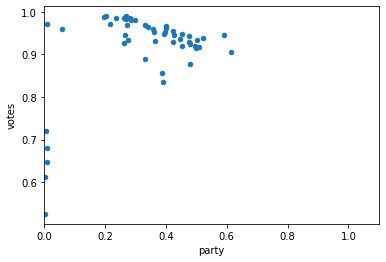

In [271]:
scatter_party("מחל")

<AxesSubplot:xlabel='party', ylabel='votes'>

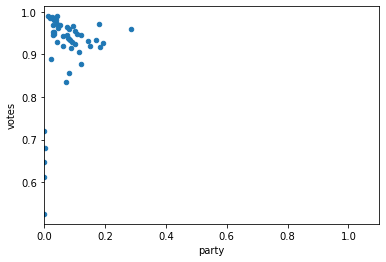

In [272]:
scatter_party("שס")

<AxesSubplot:xlabel='party', ylabel='votes'>

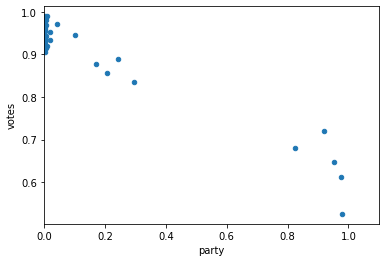

In [273]:
scatter_party("ודעם")